In [1]:
import numpy as np
import sys
import math
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.ndimage as sp
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
from tqdm import tqdm
import time 
import numpy as np 
import math
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.ndimage as sp

#open positions file
f=open('mbp_positions_063_M13_matched.txt', "r")
lines=f.readlines()

#create empty lists for relevant data 

mass = []
r_200 = []
x = []
y = []
z = []

# append data 
for k in lines:
        mass.append(k.split(  )[11])
        r_200.append(k.split(  )[13])
        x.append(k.split(  )[6])   
        y.append(k.split(  )[7]) 
        z.append(k.split(  )[8])
        
f.close()

#convert list to numpy array for with floats rather than strings 
mass_array = np.array(mass).astype(np.float)

#sort masses over 10^15 from array 
mass_15 = mass_array[mass_array > 1E+5]

#find maximum mass from sample
overdens = np.min(mass_15)
print(overdens)

r=30

# find index of selected mass in array 
result = np.where(mass_array == overdens)
print(result)

103994.7891
(array([19455], dtype=int64),)


In [3]:
x_0 = x[19455]
y_0 = y[19455]
z_0 = z[19455]
r_vir = r_200[19455]

In [4]:
f=open('radius_test.txt', "r")
lines=f.readlines()

x = []
y = []
z = []
v_x = []
v_y = []
v_z = []

for k in lines:
        x.append(k.split(  )[0])   
        y.append(k.split(  )[1]) 
        z.append(k.split(  )[2]) 
        v_x.append(k.split(  )[3])
        v_y.append(k.split(  )[4])
        v_z.append(k.split(  )[5])
        
f.close()

x_mass = np.array(x).astype(np.float)
y_mass = np.array(y).astype(np.float)
z_mass = np.array(z).astype(np.float)
v_x_mass = np.array(v_x).astype(np.float)
v_y_mass = np.array(v_y).astype(np.float)
v_z_mass = np.array(v_z).astype(np.float)
r_vir = np.array(r_vir).astype(np.float) 

In [5]:
#Dot product to find component of velocity radial to halo centre
x_radial = x_mass - float(x_0)
y_radial = y_mass - float(y_0)
z_radial = z_mass - float(z_0)

radial_v = np.ones(len(x_mass))
for i in range(len(x_mass)):
    v_r = (v_x_mass[i]*x_radial[i] + v_y_mass[i]*y_radial[i] + v_z_mass[i]*z_radial[i])/np.sqrt(x_radial[i]**2 + y_radial[i]**2 + z_radial[i]**2)
    radial_v[i] *= v_r

In [6]:
h = 0.73
H_0 = 100 * h 
a_array = np.ones(len(x_mass))
for j in range(len(x_mass)):
    a = np.sqrt(((x_mass[j] - float(x_0))**2 + (y_mass[j] - float(y_0))**2 + (z_mass[j] - float(z_0))**2))
    a_array[j] *= a
    
v_total = np.ones(len(x_mass))
for i in range(len(x_mass)):
    v = radial_v[i] + (a_array[i]*H_0)
    v_total[i] *= v
    
    

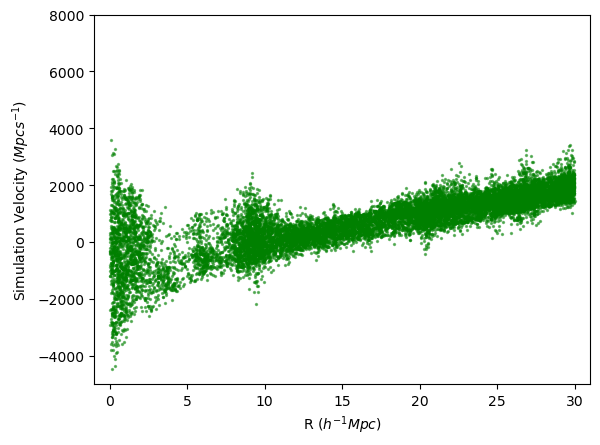

In [7]:
fig, ax = plt.subplots()

ax.scatter(a_array, v_total, color = 'green', s = 2, alpha = 0.5)
ax.set_ylim(-5000,8000)
ax.set_xlim(-1, 31)
ax.set_xlabel('R $(h^{-1} Mpc)$')
ax.set_ylabel('Simulation Velocity $(Mpc s^{-1})$')
#plt.axhline(y=0, color ='black', alpha = 0.6)
plt.show()

In [8]:
mask = a_array>5
hist, bin_edges = np.histogram(a_array, bins= 30)


In [9]:
       
h = 0.73
H_0 = 100 * h 
omega_m = 0.25
omega_lambda = 0.75
f = omega_m**(4/7) + (1 + omega_m/2)*(omega_lambda/70)
delta_c = 1.686
G = 4.301*10**-9
d_M =2.2* overdens *10**10


In [10]:
 A = (f*delta_c)/3


def B_const(G, d_M, H_0, omega_m, r):
    B = (2*G*d_M)/((H_0**2)*omega_m*r**3)
    return B

def V_func(H_0, r, A, B, delta_c):
    V_r = H_0*r*(1 - A*((B+1)**(1/delta_c) - 1))
    return V_r

r_array = np.ones(len(x_mass))
    
B_const_array = np.ones(len(r_array), dtype=np.float64)
V_r_array = np.ones(len(r_array), dtype=np.float64)

for j in range(len(x_mass)):
    a = np.sqrt(((x_mass[j] - float(x_0))**2 + (y_mass[j] - float(y_0))**2 + (z_mass[j] - float(z_0))**2))
    r_array[j] *= a



for i in range(len(r_array)):
    B_const(G, d_M, H_0, omega_m, r_array[i])

    B_const_array[i] *= B_const(G, d_M, H_0, omega_m, r_array[i])


for k in range(len(a_array)): 
    V_func(H_0, r_array[k], A, B_const_array[k], delta_c)
    V_r_array[k] *= V_func(H_0, r_array[k], A, B_const_array[k], delta_c)

In [11]:
variance = np.ones(len(bin_edges))
vert = a_array[mask]
v_y_arr = np.ones(len(vert))

for k in range(len(vert)):
    vy = v_total[mask][k] - V_r_array[mask][k]
    v_y_arr[k] *= vy

for i in range(len(bin_edges)):
    bin_array = np.array([])
    for j in range(len(a_array)):
        if a_array[j] <= bin_edges[0]:
            bin_array = np.append(bin_array, v_total[j])
        if a_array[j] <= bin_edges[i] and a_array[j] >= bin_edges[i - 1]:
     
            bin_array = np.append(bin_array, v_total[j])
        
   
    c = np.var(bin_array)
       
    variance[i] *= c
    
    

In [12]:
       
#h_range = np.arange(0.4, 1.0, 0.02) 
h_range= np.array([0.73])
omega_m = 0.25
omega_lambda = 0.75
f = omega_m**(4/7) + (1 + omega_m/2)*(omega_lambda/70)
delta_c = 1.686
G = 4.301*10**-9
#m_range = np.arange(1, 4, 0.1)
m_range = np.array([2.2])
omega_m = np.array([0.1, 0.2,0.25,0.3,0.4])
cs_true = np.array([])
for value in tqdm(omega_m):
    omega_m = value
    omega_lambda = 1-value
    f = omega_m**(4/7) + (1 + omega_m/2)*(omega_lambda/70)
    
    for value in tqdm(h_range):

        h_val = value
        H_0 = 100 * h_val

        for val in tqdm(m_range):   
            m_val = val
            A = (f*delta_c)/3
            d_M = m_val* overdens *10**10

            def B_const(G, d_M, H_0, omega_m, r):
                B = (2*G*d_M)/((H_0**2)*omega_m*r**3)
                return B

            def V_func(H_0, r, A, B, delta_c):
                V_r = H_0*r*(1 - A*((B+1)**(1/delta_c) - 1))
                return V_r

            r_array = np.ones(len(x_mass))

            B_const_array = np.ones(len(r_array), dtype=np.float64)
            V_r_array = np.ones(len(r_array), dtype=np.float64)

            for j in range(len(x_mass)):
                a = np.sqrt(((x_mass[j] - float(x_0))**2 + (y_mass[j] - float(y_0))**2 + (z_mass[j] - float(z_0))**2))
                r_array[j] *= a



            for i in range(len(r_array)):
                B_const(G, d_M, H_0, omega_m, r_array[i])

                B_const_array[i] *= B_const(G, d_M, H_0, omega_m, r_array[i])


            for k in range(len(a_array)): 
                V_func(H_0, r_array[k], A, B_const_array[k], delta_c)
                V_r_array[k] *= V_func(H_0, r_array[k], A, B_const_array[k], delta_c)

            variance = np.ones(len(bin_edges))
            vert = a_array[mask]
            cs_bins = np.array([])

            v_y_arr = np.ones(len(vert))

            for k in range(len(vert)):
                vy = v_total[mask][k] - V_r_array[mask][k]
                v_y_arr[k] *= vy

            for i in range(len(bin_edges)):

                bin_array = np.array([])
                for j in range(len(a_array)):
                    if a_array[j] <= bin_edges[0]:
                        bin_array = np.append(bin_array, v_total[j])
                    if a_array[j] <= bin_edges[i] and a_array[j] >= bin_edges[i - 1]:

                        bin_array = np.append(bin_array, v_total[j])


                c = np.var(bin_array)

                variance[i] *= c



                bin_array = np.array([])
                for j in range(len(vert)):
                    if vert[j] <= bin_edges[0]:
                        bin_array = np.append(bin_array, v_total[j])
                    if vert[j] <= bin_edges[i] and vert[j] >= bin_edges[i - 1]:
                        bin_array = np.append(bin_array, v_total[j])

                    cs_bin_array = np.ones(len(bin_array))
                    for q in range(len(bin_array)):
                        chisq = (v_y_arr[q]**2)/variance[i]

                        cs_bin_array[q] *= chisq 

                cs_bin = np.sum(cs_bin_array)

                cs_bins = np.append(cs_bins, cs_bin)
            cs_mass = np.sum(cs_bins)
            cs_true = np.append(cs_true, cs_mass)
            outfile = open('Chisq_values_omega_3.txt', 'a')
            outfile.write(str(cs_mass)+ "  " + str(m_val)+"  " + str(h_val)+ "  " + str(omega_m) + "\n" )
            outfile.close







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [02:29<00:00, 149.64s/it]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [02:26<00:00, 146.91s/it]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████

In [13]:
print(cs_true)

[8471.58814978 7826.25533935 7786.17521248 7813.8344821  7966.78791745]


In [14]:
outfile = open('Chisq_values_h.txt', 'a')
outfile.write(str(cs_mass) + "  "  + str(h_val) + "\n" )
outfile.close

<function TextIOWrapper.close()>

In [22]:
len(a_array[mask])

12554